In [105]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from Data import get_view
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
symbols = pd.read_csv("./data/symbols_valid_meta.csv")
symbols_df = pd.DataFrame(symbols)

In [97]:
intc = pd.read_csv("./data/stocks/INTC.csv")

In [96]:
intc = pd.DataFrame(intc)

In [95]:
intc

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.325521,0.330729,0.325521,0.325521,0.204750,10924800
1,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.203112,17068800
2,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.208026,18508800
3,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.207207,11174400
4,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.199836,12172800
...,...,...,...,...,...,...,...
10093,2020-03-26,51.740002,55.950001,51.660000,55.540001,55.540001,41459800
10094,2020-03-27,53.419998,54.639999,52.070000,52.369999,52.369999,31633500
10095,2020-03-30,52.990002,56.099998,52.830002,55.490002,55.490002,31628600
10096,2020-03-31,55.060001,55.799999,53.220001,54.119999,54.119999,48074700


In [94]:
symbols_df

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N
...,...,...,...,...,...,...,...,...,...,...,...,...
8044,Y,ZUO,"Zuora, Inc. Class A Common Stock",N,,N,100.0,N,NaN,ZUO,ZUO,N
8045,Y,ZVO,Zovio Inc. - Common Stock,Q,Q,N,100.0,N,N,NaN,ZVO,N
8046,Y,ZYME,Zymeworks Inc. Common Shares,N,,N,100.0,N,NaN,ZYME,ZYME,N
8047,Y,ZYNE,"Zynerba Pharmaceuticals, Inc. - Common Stock",Q,G,N,100.0,N,N,NaN,ZYNE,N


In [93]:
intc_row = symbols_df[symbols_df['Symbol'] == 'INTC'] #get Intel row

In [92]:
intc_row

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
3772,Y,INTC,Intel Corporation - Common Stock,Q,Q,N,100.0,N,N,NaN,INTC,N


In [11]:
intc_close = intc["Close"]

In [91]:
intc_close_np = intc_close.to_numpy()

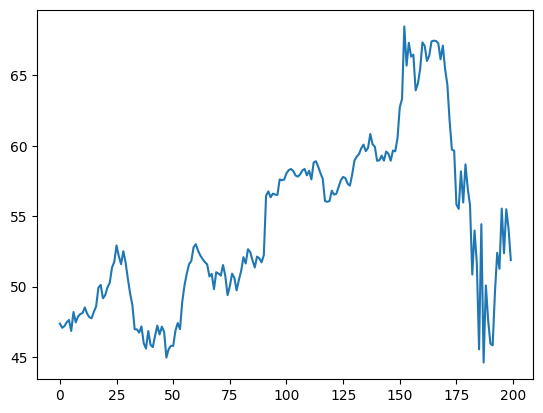

In [108]:
plt.plot(intc_close_np[-200:])

In [110]:
X = get_view(intc_close_np, 10)
print(X)
y = intc_close_np[10:]
print(y)
assert(len(X) == len(y))

[[ 0.32552084  0.32291666  0.33072916 ...  0.30989584  0.29947916
   0.31119791]
 [ 0.32291666  0.33072916  0.32942709 ...  0.29947916  0.31119791
   0.32161459]
 [ 0.33072916  0.32942709  0.31770834 ...  0.31119791  0.32161459
   0.32291666]
 ...
 [44.61000061 50.08000183 47.61000061 ... 51.25999832 55.54000092
  52.36999893]
 [50.08000183 47.61000061 45.93999863 ... 55.54000092 52.36999893
  55.49000168]
 [47.61000061 45.93999863 45.83000183 ... 52.36999893 55.49000168
  54.11999893]]
[ 0.32161459  0.32291666  0.32552084 ... 55.49000168 54.11999893
 51.88000107]


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [117]:
y_pred = rf_model.predict(X_test)

In [120]:
def calculate_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    mape = np.mean(absolute_percentage_error) * 100
    return mape

In [121]:
mape = calculate_mape(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 1.97%
